<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Explore-The-Dataset" data-toc-modified-id="Challenge-1---Explore-The-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Explore The Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-data-from-an-bird's-eye-view." data-toc-modified-id="Explore-the-data-from-an-bird's-eye-view.-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the data from an bird's-eye view.</a></span></li><li><span><a href="#Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated." data-toc-modified-id="Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated.-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>Next, evaluate if the columns in this dataset are strongly correlated.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Remove-Column-Collinearity." data-toc-modified-id="Challenge-2---Remove-Column-Collinearity.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Remove Column Collinearity.</a></span></li><li><span><a href="#Challenge-3---Handle-Missing-Values" data-toc-modified-id="Challenge-3---Handle-Missing-Values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Handle Missing Values</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions." data-toc-modified-id="In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.</a></span></li><li><span><a href="#Again,-examine-the-number-of-missing-values-in-each-column." data-toc-modified-id="Again,-examine-the-number-of-missing-values-in-each-column.-4.0.0.2"><span class="toc-item-num">4.0.0.2&nbsp;&nbsp;</span>Again, examine the number of missing values in each column.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Handle-WHOIS_*-Categorical-Data" data-toc-modified-id="Challenge-4---Handle-WHOIS_*-Categorical-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Handle <code>WHOIS_*</code> Categorical Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-fix-the-country-values-as-intructed-above." data-toc-modified-id="In-the-cells-below,-fix-the-country-values-as-intructed-above.-5.0.0.1"><span class="toc-item-num">5.0.0.1&nbsp;&nbsp;</span>In the cells below, fix the country values as intructed above.</a></span></li><li><span><a href="#If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values." data-toc-modified-id="If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values.-5.0.0.2"><span class="toc-item-num">5.0.0.2&nbsp;&nbsp;</span>If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.</a></span></li><li><span><a href="#After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER." data-toc-modified-id="After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER.-5.0.0.3"><span class="toc-item-num">5.0.0.3&nbsp;&nbsp;</span>After verifying, now let's keep the top 10 values of the column and re-label other columns with <code>OTHER</code>.</a></span></li><li><span><a href="#In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE']." data-toc-modified-id="In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE'].-5.0.0.4"><span class="toc-item-num">5.0.0.4&nbsp;&nbsp;</span>In the next cell, drop <code>['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']</code>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal" data-toc-modified-id="Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Handle Remaining Categorical Data &amp; Convert to Ordinal</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate." data-toc-modified-id="URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate.-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span><code>URL</code> is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.</a></span></li><li><span><a href="#Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is." data-toc-modified-id="Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is.-6.0.0.2"><span class="toc-item-num">6.0.0.2&nbsp;&nbsp;</span>Print the unique value counts of <code>CHARSET</code>. You see there are only a few unique values. So we can keep it as it is.</a></span></li><li><span><a href="#Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next." data-toc-modified-id="Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next.-6.0.0.3"><span class="toc-item-num">6.0.0.3&nbsp;&nbsp;</span>Before you think of your own solution, don't read the instructions that come next.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-6---Modeling,-Prediction,-and-Evaluation" data-toc-modified-id="Challenge-6---Modeling,-Prediction,-and-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Modeling, Prediction, and Evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-this-lab,-we-will-try-two-different-models-and-compare-our-results." data-toc-modified-id="In-this-lab,-we-will-try-two-different-models-and-compare-our-results.-7.0.0.1"><span class="toc-item-num">7.0.0.1&nbsp;&nbsp;</span>In this lab, we will try two different models and compare our results.</a></span></li><li><span><a href="#Our-second-algorithm-is-is-DecisionTreeClassifier" data-toc-modified-id="Our-second-algorithm-is-is-DecisionTreeClassifier-7.0.0.2"><span class="toc-item-num">7.0.0.2&nbsp;&nbsp;</span>Our second algorithm is is DecisionTreeClassifier</a></span></li><li><span><a href="#We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5." data-toc-modified-id="We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5.-7.0.0.3"><span class="toc-item-num">7.0.0.3&nbsp;&nbsp;</span>We'll create another DecisionTreeClassifier model with max_depth=5.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Bonus-Challenge---Feature-Scaling" data-toc-modified-id="Bonus-Challenge---Feature-Scaling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge - Feature Scaling</a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

Your features will be:

+ URL: it is the anonymous identification of the URL analyzed in the study
+ URL_LENGTH: it is the number of characters in the URL
+ NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
+ CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
+ SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
+ CONTENT_LENGTH: it represents the content size of the HTTP header.
+ WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM
+ WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
+ TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
+ DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
+ REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
+ APP_BYTES: this is the number of bytes transfered
+ SOURCE_APP_PACKETS: packets sent from the honeypot to the server
+ REMOTE_APP_PACKETS: packets received from the server
+ APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
+ DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
+ TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:


*Source: [kaggle](https://www.kaggle.com/viratkothari/malicious-and-benign-websites-classification)*

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# What the dataset looks like?
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
# What are the data types?
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
# Which columns contain the features of the websites?
websites.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
URL,1781,1781,M0_109,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URL_LENGTH,1781.0,NaN,NaN,NaN,56.961258,27.555586,16.0,39.0,49.0,68.0,249.0
NUMBER_SPECIAL_CHARACTERS,1781.0,NaN,NaN,NaN,11.111735,4.549896,5.0,8.0,10.0,13.0,43.0
CHARSET,1774,8,UTF-8,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SERVER,1605,238,Apache,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CONTENT_LENGTH,969.0,NaN,NaN,NaN,11726.927761,36391.809051,0.0,324.0,1853.0,11323.0,649263.0
WHOIS_COUNTRY,1475,48,US,1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WHOIS_STATEPRO,1419,181,CA,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WHOIS_REGDATE,1654,890,17/09/2008 0:00,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WHOIS_UPDATED_DATE,1642,593,2/09/2016 0:00,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?

websites['Type'].value_counts()

Type
0    1565
1     216
Name: count, dtype: int64

In [7]:
# 0 for bening 1 for maliciuos websites

In [8]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

num = websites._get_numeric_data().columns

categorical = [w for w in websites.columns if w not in num]

categorical

['URL',
 'CHARSET',
 'SERVER',
 'WHOIS_COUNTRY',
 'WHOIS_STATEPRO',
 'WHOIS_REGDATE',
 'WHOIS_UPDATED_DATE']

In [9]:
numeric = websites.drop(columns= ['URL', 'CHARSET',
 'SERVER',
 'WHOIS_COUNTRY',
 'WHOIS_STATEPRO',
 'WHOIS_REGDATE',
 'WHOIS_UPDATED_DATE'])

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
websites['URL'].nunique()

1781

In [12]:
encoder = OrdinalEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(websites)

# Convert the result back to a DataFrame
df_encoded = pd.DataFrame(encoded_data, columns=websites.columns)

df_encoded

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,1574.0,0.0,2.0,3.0,199.0,60.0,NaN,NaN,59.0,NaN,...,0.0,2.0,64.0,9.0,10.0,156.0,76.0,9.0,1.0,1.0
1,796.0,0.0,1.0,2.0,61.0,466.0,NaN,NaN,NaN,NaN,...,7.0,4.0,188.0,17.0,19.0,165.0,150.0,17.0,0.0,0.0
2,1479.0,0.0,1.0,4.0,115.0,73.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,132.0,1.0,1.0,1.0,199.0,16.0,41.0,4.0,806.0,68.0,...,22.0,3.0,604.0,39.0,37.0,567.0,609.0,39.0,4.0,0.0
4,982.0,1.0,1.0,2.0,NaN,628.0,41.0,136.0,93.0,42.0,...,2.0,5.0,643.0,61.0,62.0,852.0,630.0,61.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1748.0,137.0,11.0,2.0,7.0,NaN,13.0,17.0,248.0,236.0,...,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0
1777,1741.0,138.0,12.0,2.0,7.0,NaN,13.0,17.0,248.0,236.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0
1778,451.0,139.0,27.0,5.0,31.0,353.0,41.0,35.0,166.0,125.0,...,2.0,6.0,755.0,85.0,85.0,854.0,744.0,85.0,2.0,0.0
1779,153.0,140.0,27.0,1.0,147.0,NaN,41.0,21.0,7.0,592.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_encoded['URL'].nunique()

1781

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

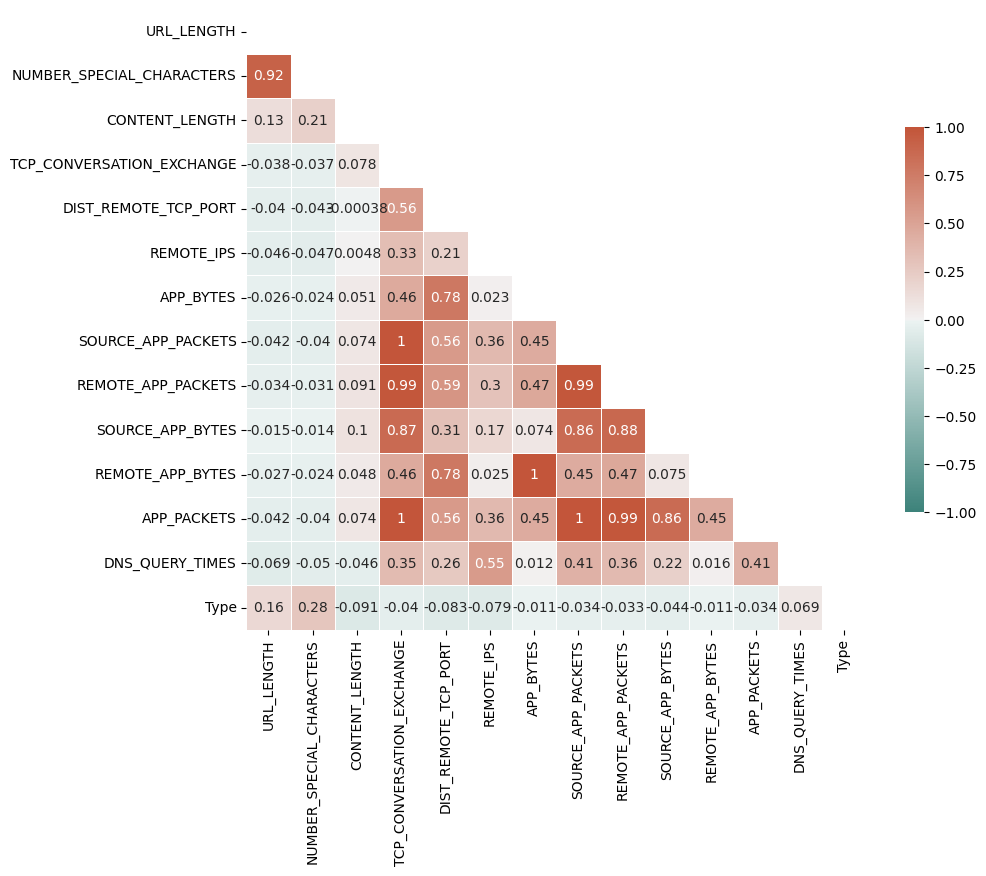

In [14]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

correlation = numeric.corr()

mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [15]:
def print_corr(df):
    '''
        Function that return a correlation matrix in a heatmap plot.
        
        Parameters : Pandas DataFrame
        
        Return: seaborn heatmap
    '''
    correlation = df.corr()

    mask = np.zeros_like(correlation, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(10, 10))

    cmap = sns.diverging_palette(180, 20, as_cmap=True)
    sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    return plt.show()

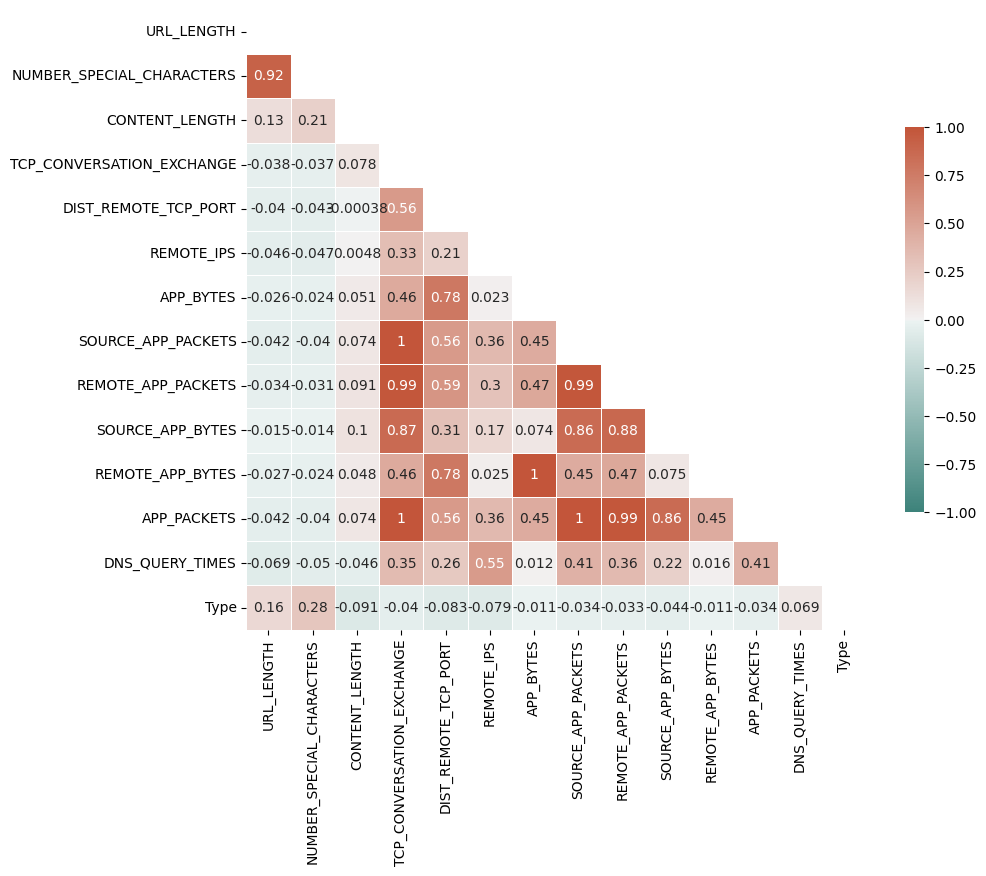

In [16]:
print_corr(numeric)

### This is an example to know the feacture importance using a ML model

In [17]:
#! pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb2 = XGBClassifier(importance_type='gain')

In [18]:
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type

In [19]:
xgb.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
sort_idx = xgb.feature_importances_.argsort()

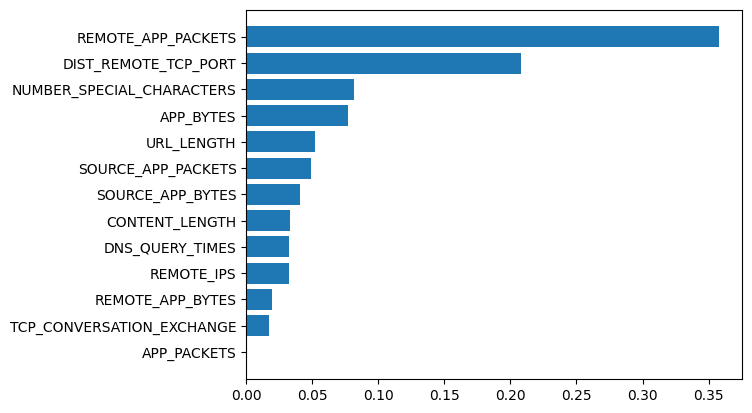

In [21]:
plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
plt.show();

    In the previous plot we can see the feactures with lower weight in the dataset.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

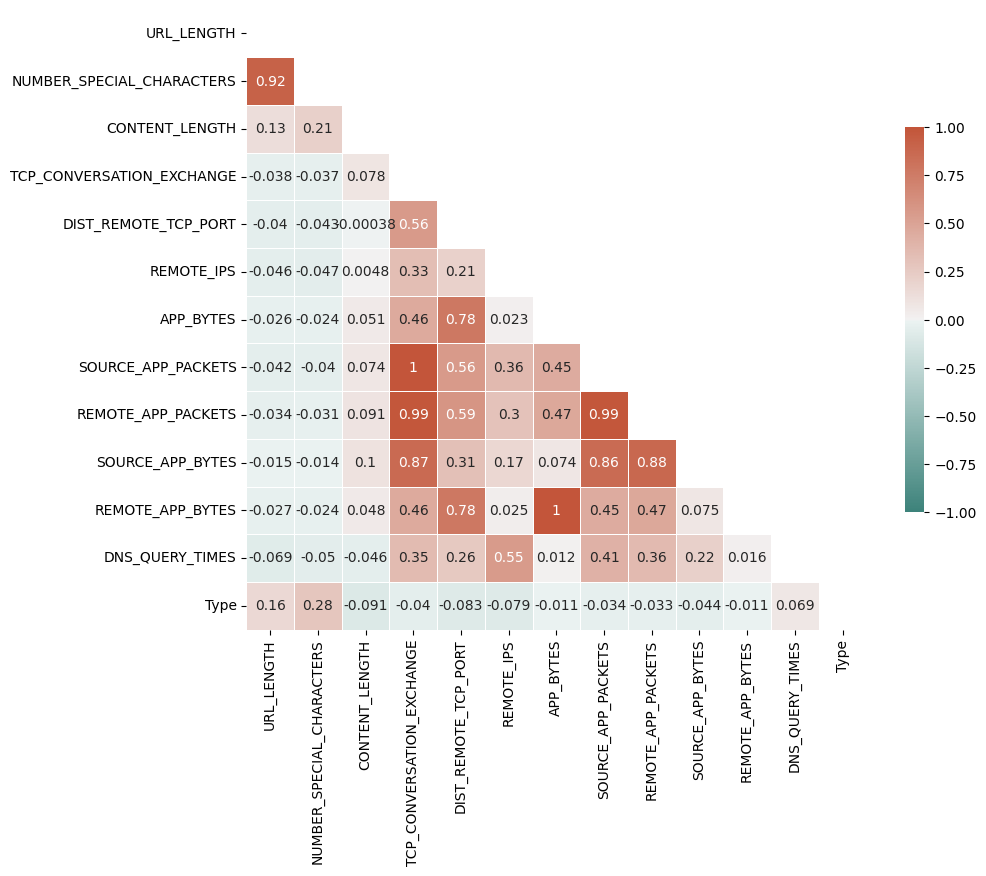

In [24]:
websites = websites.drop('APP_PACKETS', axis=1)

print_corr(websites._get_numeric_data())

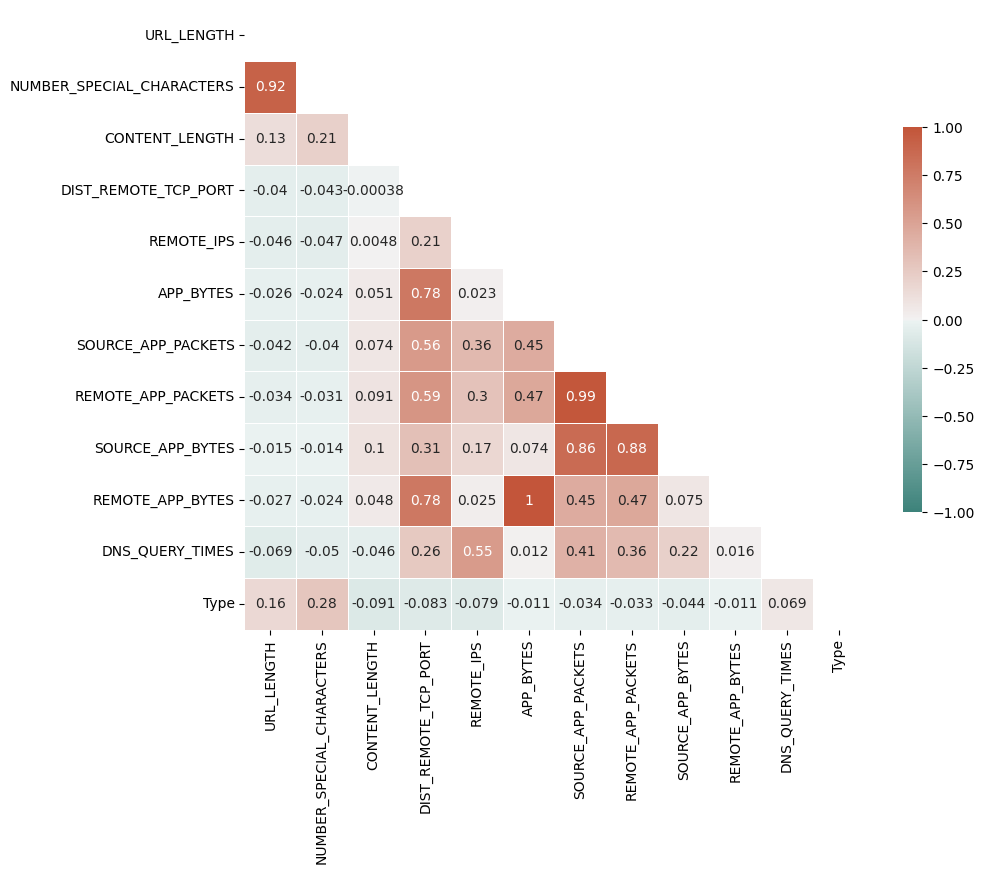

In [25]:
websites = websites.drop('TCP_CONVERSATION_EXCHANGE', axis=1)

print_corr(websites._get_numeric_data())

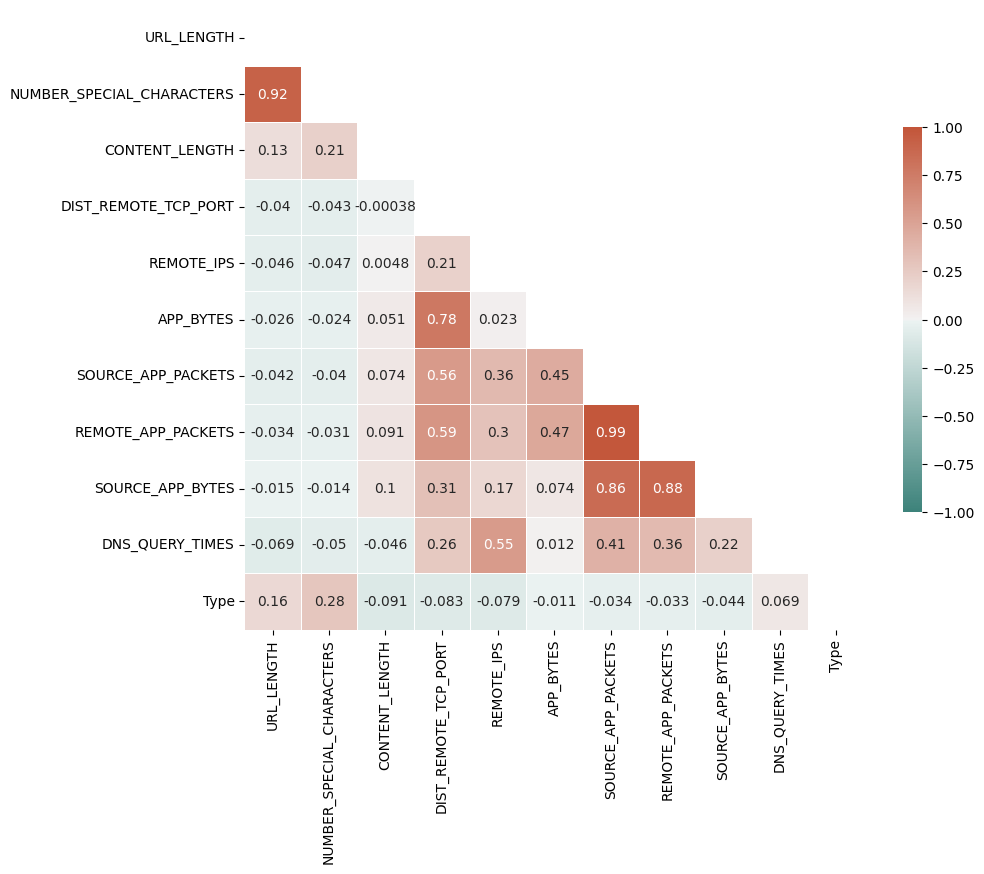

In [26]:
websites = websites.drop('REMOTE_APP_BYTES', axis=1)

print_corr(websites._get_numeric_data())

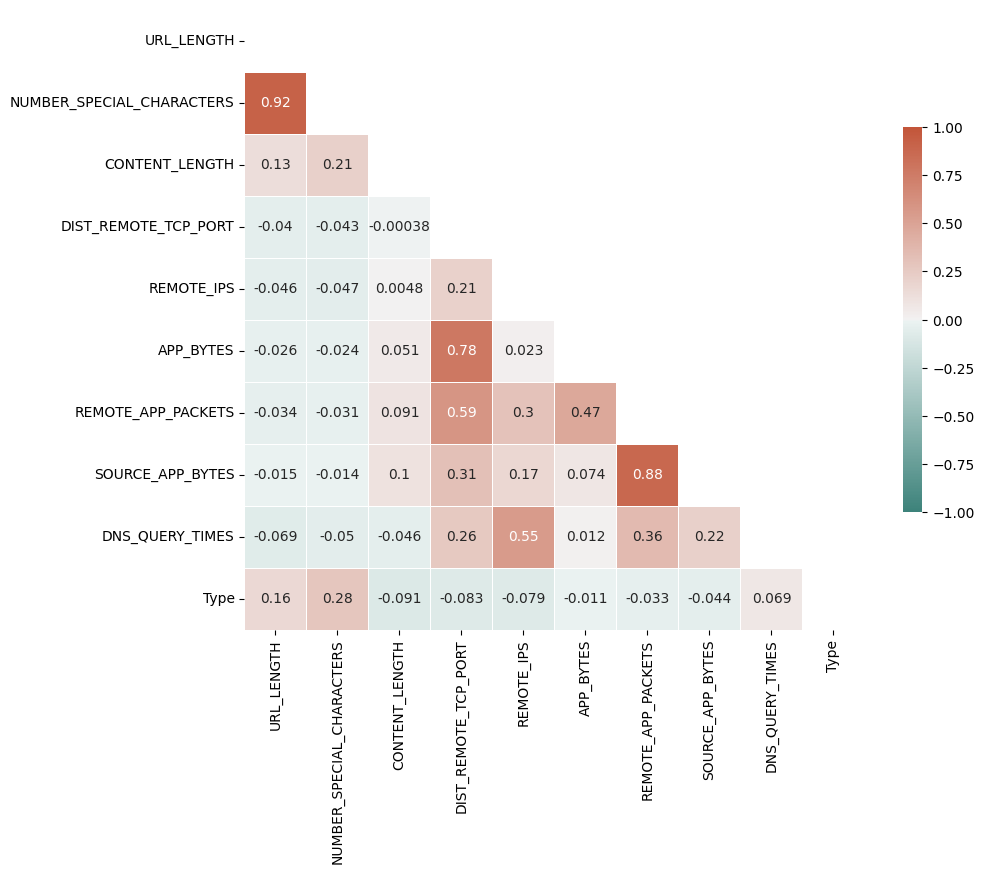

In [27]:
websites = websites.drop('SOURCE_APP_PACKETS', axis=1)

print_corr(websites._get_numeric_data())

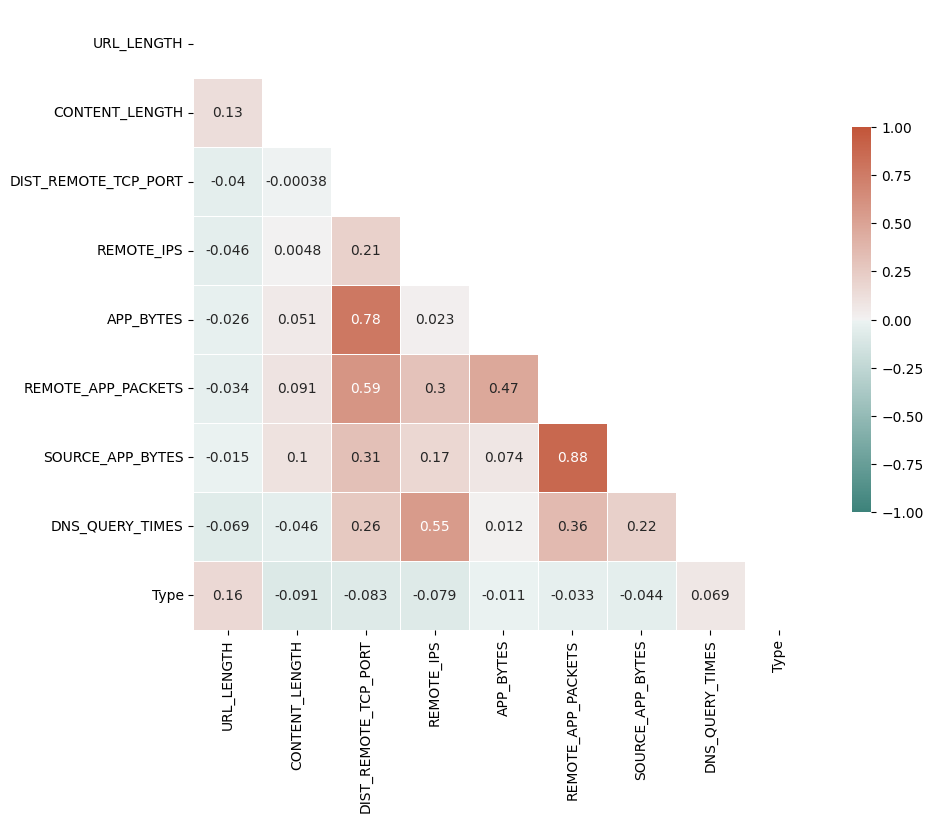

In [28]:
websites = websites.drop('NUMBER_SPECIAL_CHARACTERS', axis=1)

print_corr(websites._get_numeric_data())

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [29]:
# Your code here
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1781 non-null   object 
 1   URL_LENGTH            1781 non-null   int64  
 2   CHARSET               1774 non-null   object 
 3   SERVER                1605 non-null   object 
 4   CONTENT_LENGTH        969 non-null    float64
 5   WHOIS_COUNTRY         1475 non-null   object 
 6   WHOIS_STATEPRO        1419 non-null   object 
 7   WHOIS_REGDATE         1654 non-null   object 
 8   WHOIS_UPDATED_DATE    1642 non-null   object 
 9   DIST_REMOTE_TCP_PORT  1781 non-null   int64  
 10  REMOTE_IPS            1781 non-null   int64  
 11  APP_BYTES             1781 non-null   int64  
 12  REMOTE_APP_PACKETS    1781 non-null   int64  
 13  SOURCE_APP_BYTES      1781 non-null   int64  
 14  DNS_QUERY_TIMES       1780 non-null   float64
 15  Type                 

In [30]:
# Firts we will drop the columns with more than 50% of missing data

websites = websites.drop('CONTENT_LENGTH', axis=1)

In [31]:
# Now we will drop the rows with missing data

websites = websites.dropna()

#### Again, examine the number of missing values in each column. 

    If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [32]:
# Examine missing values in each column
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1257 non-null   object 
 1   URL_LENGTH            1257 non-null   int64  
 2   CHARSET               1257 non-null   object 
 3   SERVER                1257 non-null   object 
 4   WHOIS_COUNTRY         1257 non-null   object 
 5   WHOIS_STATEPRO        1257 non-null   object 
 6   WHOIS_REGDATE         1257 non-null   object 
 7   WHOIS_UPDATED_DATE    1257 non-null   object 
 8   DIST_REMOTE_TCP_PORT  1257 non-null   int64  
 9   REMOTE_IPS            1257 non-null   int64  
 10  APP_BYTES             1257 non-null   int64  
 11  REMOTE_APP_PACKETS    1257 non-null   int64  
 12  SOURCE_APP_BYTES      1257 non-null   int64  
 13  DNS_QUERY_TIMES       1257 non-null   float64
 14  Type                  1257 non-null   int64  
dtypes: float64(1), int64(7), o

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [33]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                957
CA                 75
ES                 63
AU                 26
PA                 21
GB                 13
JP                 10
CZ                  8
CN                  8
IN                  8
NL                  5
[u'GB'; u'UK']      5
CH                  5
BS                  4
UK                  4
ru                  4
AT                  4
KY                  3
PH                  3
SC                  3
us                  3
HK                  2
UA                  2
UY                  2
KG                  2
SI                  2
RU                  2
TR                  1
UG                  1
PK                  1
IL                  1
DE                  1
SE                  1
IT                  1
NO                  1
BE                  1
BY                  1
AE                  1
IE                  1
LV                  1
Name: count, dtype: int64

In [34]:
countries = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x : countries[x])




In [35]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'UK', 'NL', 'UG', 'JP',
       'CN', 'SI', 'KY', 'AT', 'CZ', 'PH', 'LV', 'TR', 'ES', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IL', 'DE', 'SE', 'IT', 'NO', 'BE', 'BY', 'AE',
       'IE', 'UY', 'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [36]:
# Your code here
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

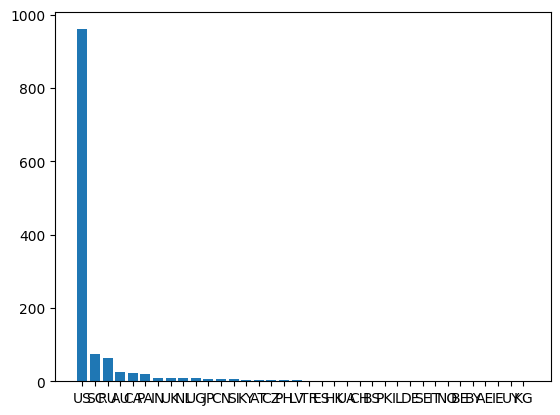

<Figure size 1500x1500 with 0 Axes>

In [37]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [38]:
country_dicy=dict(websites.WHOIS_COUNTRY.value_counts()[:10])

In [39]:
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x: 'OTHER' if x not in country_dicy else x)

In [40]:
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x: 'OTHER' if x == 'None' else x)

In [41]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US       960
CA        75
ES        63
OTHER     56
AU        26
UK        22
PA        21
JP        10
IN         8
CN         8
CZ         8
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [42]:
# Your code here
websites = websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [43]:
# Your code here
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1257 non-null   object 
 1   URL_LENGTH            1257 non-null   int64  
 2   CHARSET               1257 non-null   object 
 3   SERVER                1257 non-null   object 
 4   WHOIS_COUNTRY         1257 non-null   object 
 5   DIST_REMOTE_TCP_PORT  1257 non-null   int64  
 6   REMOTE_IPS            1257 non-null   int64  
 7   APP_BYTES             1257 non-null   int64  
 8   REMOTE_APP_PACKETS    1257 non-null   int64  
 9   SOURCE_APP_BYTES      1257 non-null   int64  
 10  DNS_QUERY_TIMES       1257 non-null   float64
 11  Type                  1257 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 127.7+ KB


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [44]:
# Your code here
websites = websites.drop('URL', axis=1)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [45]:
# Your code here
websites.CHARSET.unique()

array(['ISO-8859-1', 'UTF-8', 'iso-8859-1', 'us-ascii', 'utf-8',
       'windows-1251', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [46]:
# Your code here
websites.SERVER.unique()

array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0', 'Apache',
       'openresty/1.11.2.1', 'Apache/2.4.7 (Ubuntu)', 'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'cloudflare-nginx', 'Apache/2.2.22', 'nginx/1.8.0',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22 (Debian)', 'Apache/2.2.15 (CentOS)',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Pepyaka/1.11.3', 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25', 'Tengine',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3',
       'Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1',
       'ATS', 'CherryPy/3.6.0', 'Apache/2.2.15 (Red Hat)', 'Server',
       'Apache/2.4.6 (C

In [47]:
len(websites.SERVER.unique())

193

![Think Hard](../think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [48]:
# Your comment here
websites['SERVER'] = websites['SERVER'].fillna("Unknown").apply(lambda x: 'Microsoft' if 'Microsoft' in x else 'Apache' if 'Apache' in x else 'nginx' if 'nginx' in x else 'Other')


In [49]:
# Count `SERVER` value counts here
websites.SERVER.value_counts()

SERVER
Apache       491
nginx        322
Other        300
Microsoft    144
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [50]:
# Your code here
website_dummy = pd.get_dummies(websites, drop_first=True)

website_dummy

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,CHARSET_UTF-8,CHARSET_iso-8859-1,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
3,17,22,3,3812,37,18784,8.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
5,18,6,9,894,13,838,0.0,0,True,False,...,False,False,False,False,False,False,True,False,False,False
6,18,0,3,1189,13,8559,2.0,0,False,True,...,False,False,False,False,False,False,False,False,False,True
7,19,0,0,0,0,0,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
10,20,0,0,0,0,0,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,0,0,0,3,186,0.0,1,True,False,...,False,False,False,True,False,False,False,False,False,False
1777,198,0,0,0,2,124,0.0,1,True,False,...,False,False,False,True,False,False,False,False,False,False
1778,201,2,6,6631,89,132181,4.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
1779,234,0,0,0,0,0,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [51]:
# Your code here
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL_LENGTH            1257 non-null   int64  
 1   DIST_REMOTE_TCP_PORT  1257 non-null   int64  
 2   REMOTE_IPS            1257 non-null   int64  
 3   APP_BYTES             1257 non-null   int64  
 4   REMOTE_APP_PACKETS    1257 non-null   int64  
 5   SOURCE_APP_BYTES      1257 non-null   int64  
 6   DNS_QUERY_TIMES       1257 non-null   float64
 7   Type                  1257 non-null   int64  
 8   CHARSET_UTF-8         1257 non-null   bool   
 9   CHARSET_iso-8859-1    1257 non-null   bool   
 10  CHARSET_us-ascii      1257 non-null   bool   
 11  CHARSET_utf-8         1257 non-null   bool   
 12  CHARSET_windows-1251  1257 non-null   bool   
 13  CHARSET_windows-1252  1257 non-null   bool   
 14  SERVER_Microsoft      1257 non-null   bool   
 15  SERVER_Other          1257

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [52]:
from sklearn.model_selection import train_test_split

# Your code here:
X = website_dummy.drop('Type', axis=1)
y = website_dummy.Type


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66, test_size=.2, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1005, 26), (252, 26), (1005,), (252,))

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [53]:
# Your code here:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

logr = LogisticRegression()
X_train.isna().sum()

URL_LENGTH              0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
REMOTE_APP_PACKETS      0
SOURCE_APP_BYTES        0
DNS_QUERY_TIMES         0
CHARSET_UTF-8           0
CHARSET_iso-8859-1      0
CHARSET_us-ascii        0
CHARSET_utf-8           0
CHARSET_windows-1251    0
CHARSET_windows-1252    0
SERVER_Microsoft        0
SERVER_Other            0
SERVER_nginx            0
WHOIS_COUNTRY_CA        0
WHOIS_COUNTRY_CN        0
WHOIS_COUNTRY_CZ        0
WHOIS_COUNTRY_ES        0
WHOIS_COUNTRY_IN        0
WHOIS_COUNTRY_JP        0
WHOIS_COUNTRY_OTHER     0
WHOIS_COUNTRY_PA        0
WHOIS_COUNTRY_UK        0
WHOIS_COUNTRY_US        0
dtype: int64

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [77]:
# Your code here:
logr.fit(X_train, y_train)


C:\Users\pieri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [78]:
y_pred = logr.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicted Value')

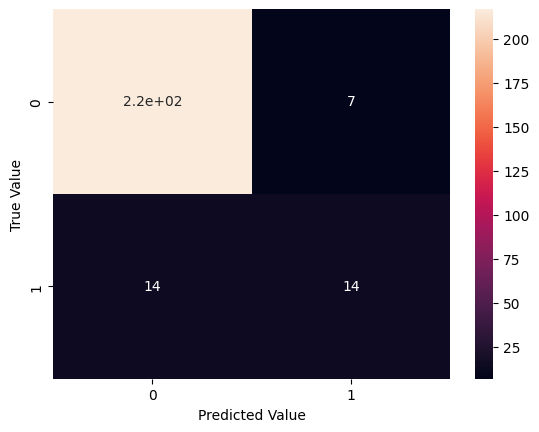

In [79]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
plt.ylabel("True Value")
plt.xlabel("Predicted Value")

In [80]:
accuracy_score(y_test, y_pred)

0.9166666666666666

In [81]:
f1_score(y_test, y_pred)

0.5714285714285714

What are your thoughts on the performance of the model? Write your conclusions below.

### Your conclusions here:

The model is functioning correctly overall, but it has a high rate of Type 2 errors, incorrectly predicting non-malicious websites as malicious.


#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [97]:
# Your code here:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

Text(0.5, 23.52222222222222, 'Predicted Value')

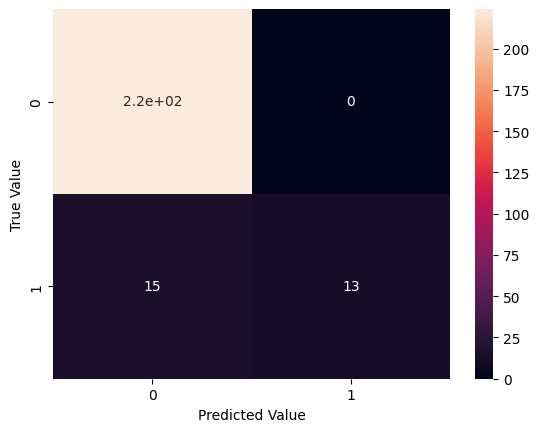

In [98]:
# Your code here:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
plt.ylabel("True Value")
plt.xlabel("Predicted Value")

In [85]:
accuracy_score(y_test, y_pred)

0.9404761904761905

In [86]:
f1_score(y_test, y_pred)

0.6341463414634146

#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [99]:
# Your code here:

dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicted Value')

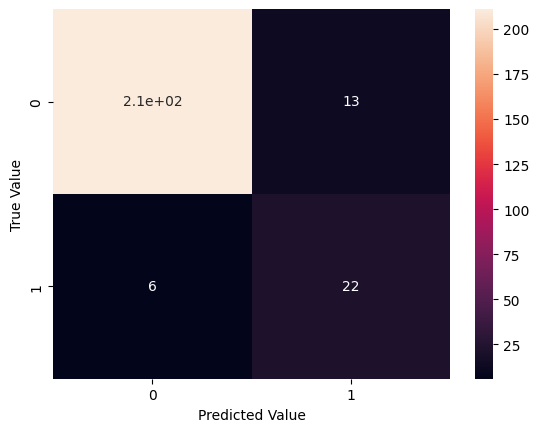

In [100]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
plt.ylabel("True Value")
plt.xlabel("Predicted Value")

In [101]:
accuracy_score(y_test, y_pred)

0.9246031746031746

In [102]:
f1_score(y_test, y_pred)

0.6984126984126984

Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

### Your conclusions here:

The accuracy was decrease in the second model, but the number of true positive was increased.


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [91]:
# Your code here

from sklearn.preprocessing import RobustScaler

In [92]:
rob = RobustScaler()

X_train_scaler = rob.fit_transform(X_train)
X_test_scaler = rob.transform(X_test)


In [93]:
logr.fit(X_train_scaler, y_train)
y_pred = logr.predict(X_test_scaler)

confusion_matrix(y_test, y_pred)

array([[222,   2],
       [ 14,  14]], dtype=int64)

In [94]:
accuracy_score(y_test, y_pred)

0.9365079365079365

In [95]:
f1_score(y_test, y_pred)

0.6363636363636364